# Expedia Hotel Recommendations

### The goal is to predict the booking outcome i.e the hotel cluster for a user event, based on their search and otheir attributes associated with that user event

## Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read datasets

In [2]:
train =pd.read_csv("C:\\Users\\Anushree\\Desktop\\machine learning\\project\\expedia-hotel-recommendations\\train.csv", nrows =100000)  
test = pd.read_csv("C:\\Users\\Anushree\\Desktop\\machine learning\\project\\expedia-hotel-recommendations\\test.csv", nrows =100000)

In [3]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
train.tail()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
99995,2013-04-01 14:26:31,37,1,69,612,3062,NaN,391007,0,0,...,0,1,20590,6,0,1,6,180,1518,30
99996,2013-04-01 17:01:22,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,5
99997,2013-04-01 17:04:26,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,93
99998,2013-04-01 17:05:01,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,20
99999,2013-04-01 18:15:01,37,1,69,612,3062,NaN,391007,0,0,...,0,1,30326,3,0,1,6,180,1518,3


In [5]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [6]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [8]:
train = pd.read_csv("C:\\Users\\Anushree\\Desktop\\machine learning\\project\\code\\input\\train.csv", parse_dates=['date_time'] ,sep=',',nrows=200000)

In [9]:
train.shape

(200000, 24)

In [10]:
train.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                    

## Check Missing values

In [11]:
train.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [12]:
total_null = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending = False)
missing_dt = pd.concat([total_null, percent], axis =1, keys=['Total_null','Percent'])


In [13]:
missing_dt.head(20)

,Total_null,Percent
orig_destination_distance,69637,0.348185
srch_co,177,0.000885
srch_ci,177,0.000885
srch_adults_cnt,0,0.000000
hotel_market,0,0.000000
hotel_country,0,0.000000
hotel_continent,0,0.000000
cnt,0,0.000000
is_booking,0,0.000000
srch_destination_type_id,0,0.000000


In [14]:
train.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [15]:
train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)

In [16]:
train.isnull().sum()

date_time                      0
site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id                        0
is_mobile                      0
is_package                     0
channel                        0
srch_ci                      177
srch_co                      177
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
dtype: int64

In [17]:
train.dropna(inplace=True)

In [18]:
train.isnull().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

In [19]:
train.shape

(199823, 24)

In [20]:
test.isnull().sum()

id                               0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    33619
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                          1
srch_co                          1
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
dtype: int64

In [21]:
total_null=test.isnull().sum().sort_values(ascending=False)
percent=(test.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total_null, percent], axis=1, keys=['Total_null', 'Percent'])
missing_data.head(20)

,Total_null,Percent
orig_destination_distance,33619,0.168244
srch_ci,1,0.000005
srch_co,1,0.000005
id,0,0.000000
hotel_country,0,0.000000
hotel_continent,0,0.000000
srch_destination_type_id,0,0.000000
srch_destination_id,0,0.000000
srch_rm_cnt,0,0.000000
srch_children_cnt,0,0.000000


In [22]:
test['orig_destination_distance'].fillna(test['orig_destination_distance'].mean(), inplace=True)

In [23]:
test.isnull().sum()

id                           0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      1
srch_co                      1
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
hotel_continent              0
hotel_country                0
hotel_market                 0
dtype: int64

In [24]:
test.dropna(inplace=True)

In [25]:
test.isnull().sum()

id                           0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
hotel_continent              0
hotel_country                0
hotel_market                 0
dtype: int64

In [26]:
test.shape

(99999, 22)

## Visualization

### 1. Correlation between the columns to check if there is any linear correlation between any columns

In [27]:
numeric_columns = train.select_dtypes(include=['number']).columns
train_numeric = train[numeric_columns]

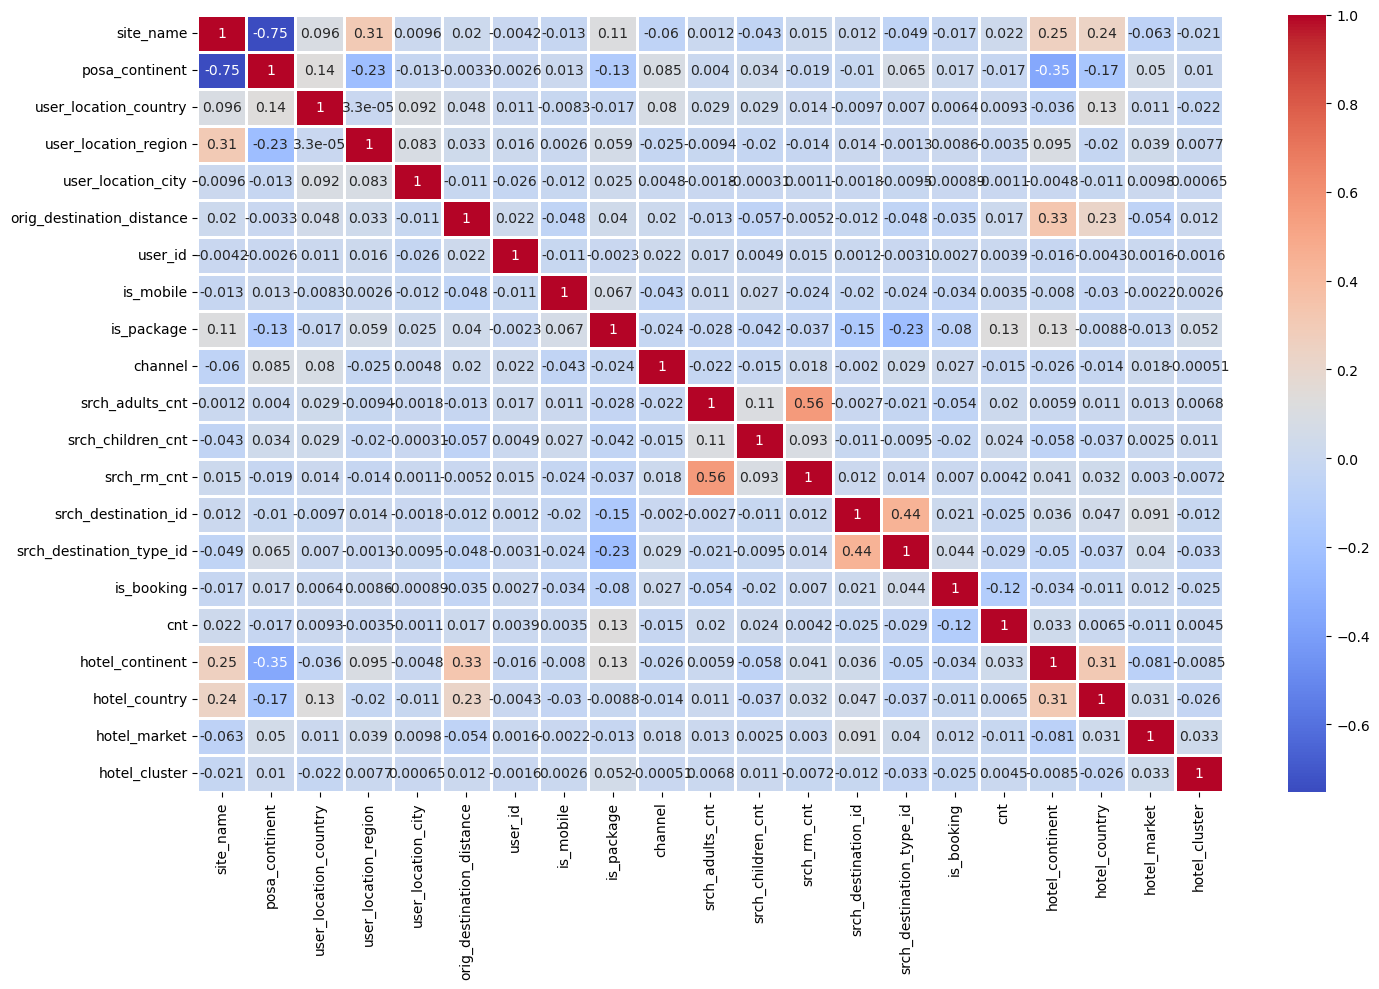

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(train_numeric.corr(), cmap ='coolwarm', ax=ax, annot=True, linewidths =2)

plt.tight_layout()
plt.show()


fig.savefig('heatmap.png', dpi=300)

### 2. Frequency of bookings through mobile

<Axes: xlabel='is_mobile', ylabel='count'>

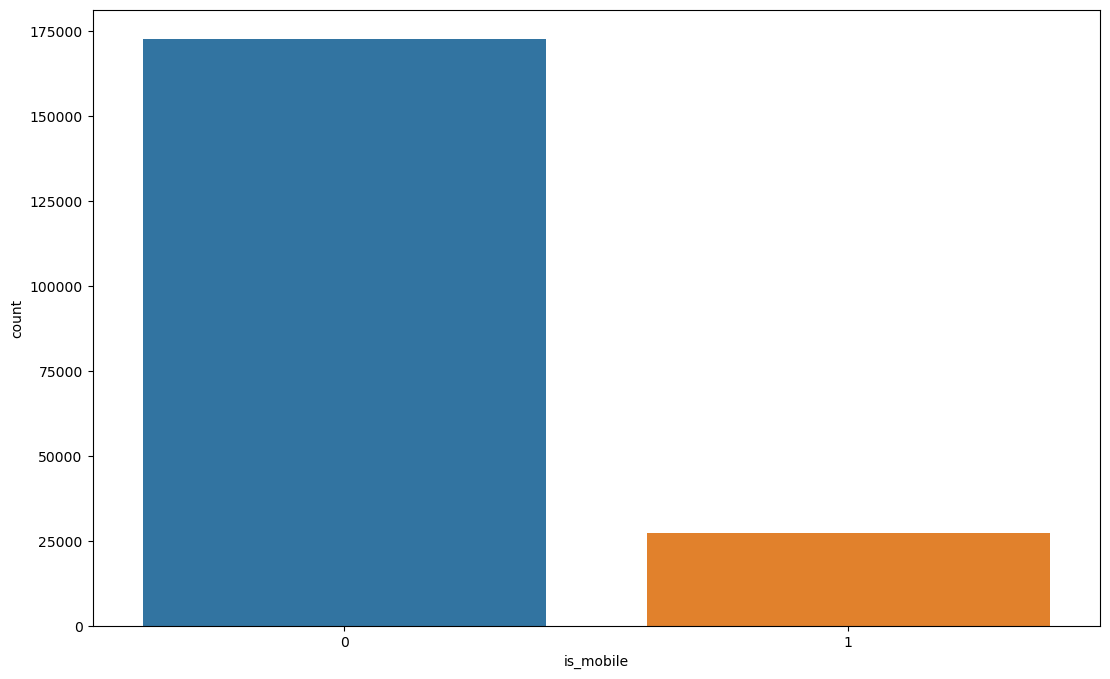

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=train, order=[0,1],ax=ax)

### 3. Frequency of bookings with total package

<Axes: xlabel='is_package', ylabel='count'>

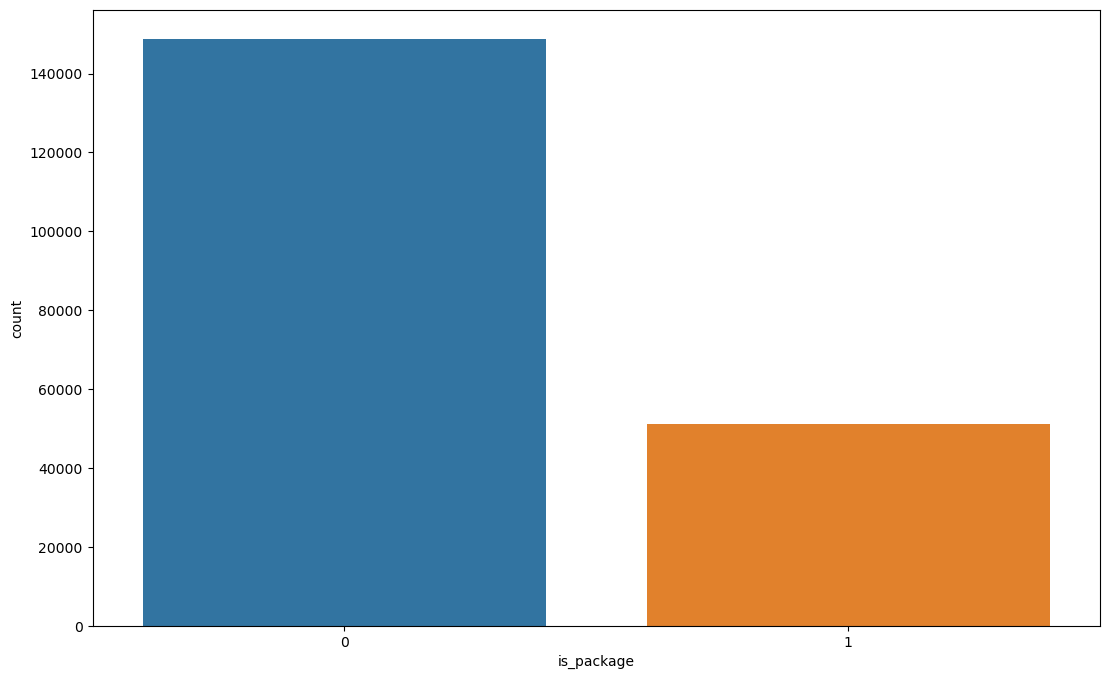

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=train, order=[0,1], ax=ax)

### 4. Frequency of continent site used for booking

<Axes: xlabel='posa_continent', ylabel='count'>

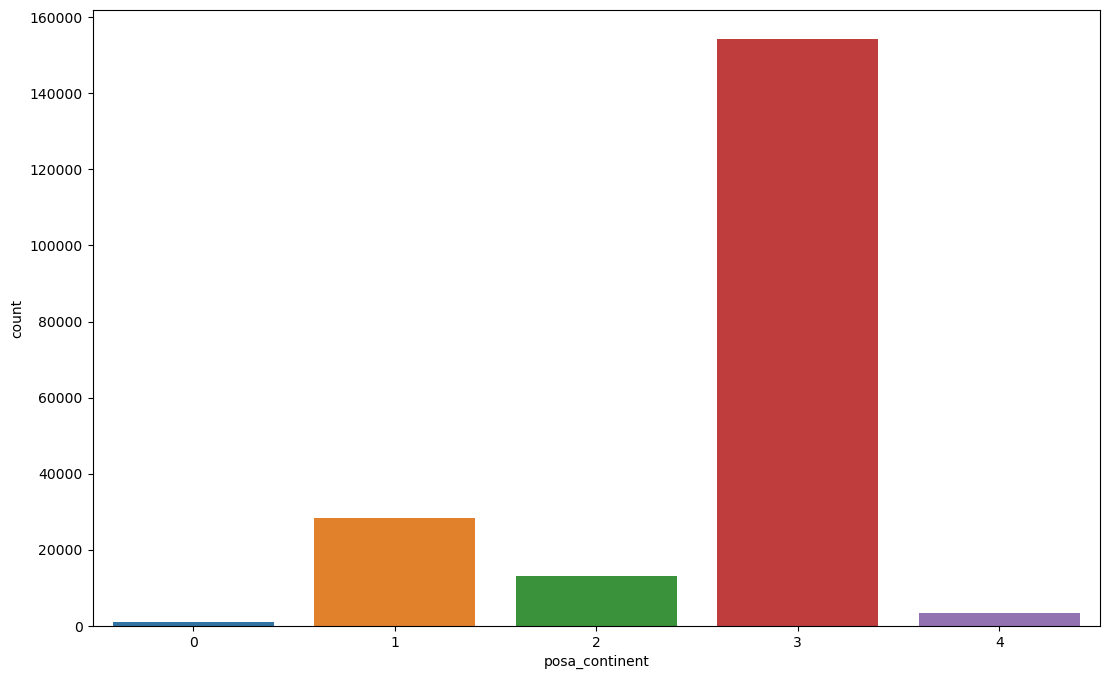

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', data=train, order=[0, 1, 2, 3, 4], ax=ax)


### 5. Which countries has the most no. of hotels?

<Axes: xlabel='hotel_continent', ylabel='count'>

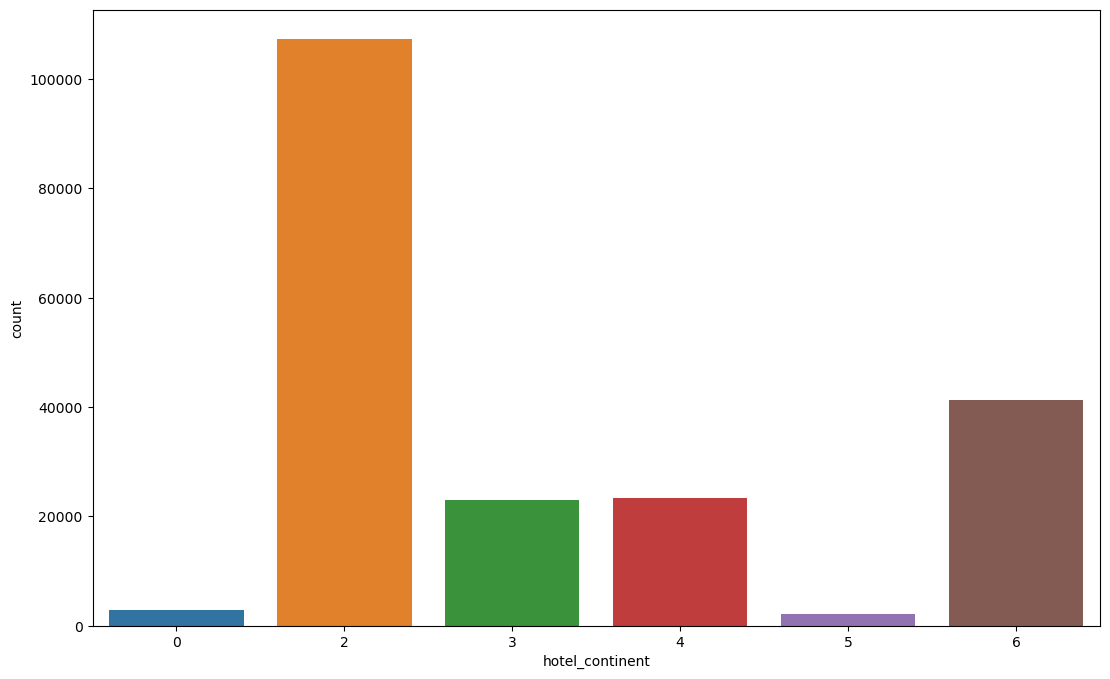

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', data=train,order=[0,2,3,4,5,6],ax=ax)

<Axes: xlabel='hotel_continent', ylabel='count'>

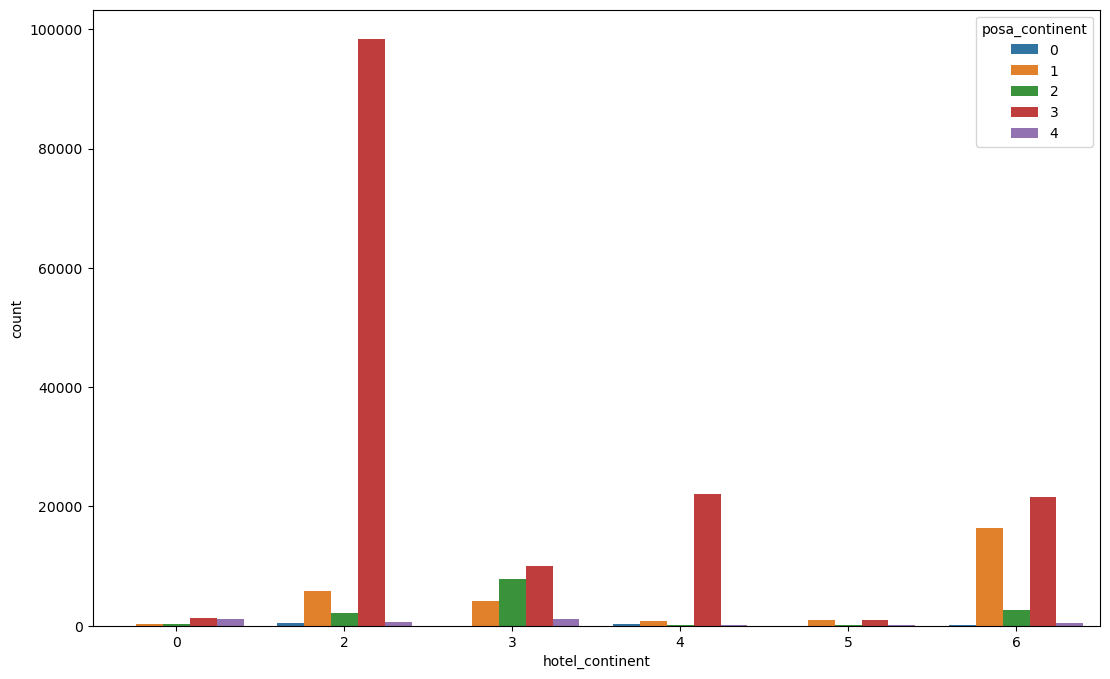

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

### Explore data where customers have made a booking.

In [34]:
bookings=train[train["is_booking"] == 1]

### 7. Countries the customer travel from?

<Axes: xlabel='user_location_country', ylabel='count'>

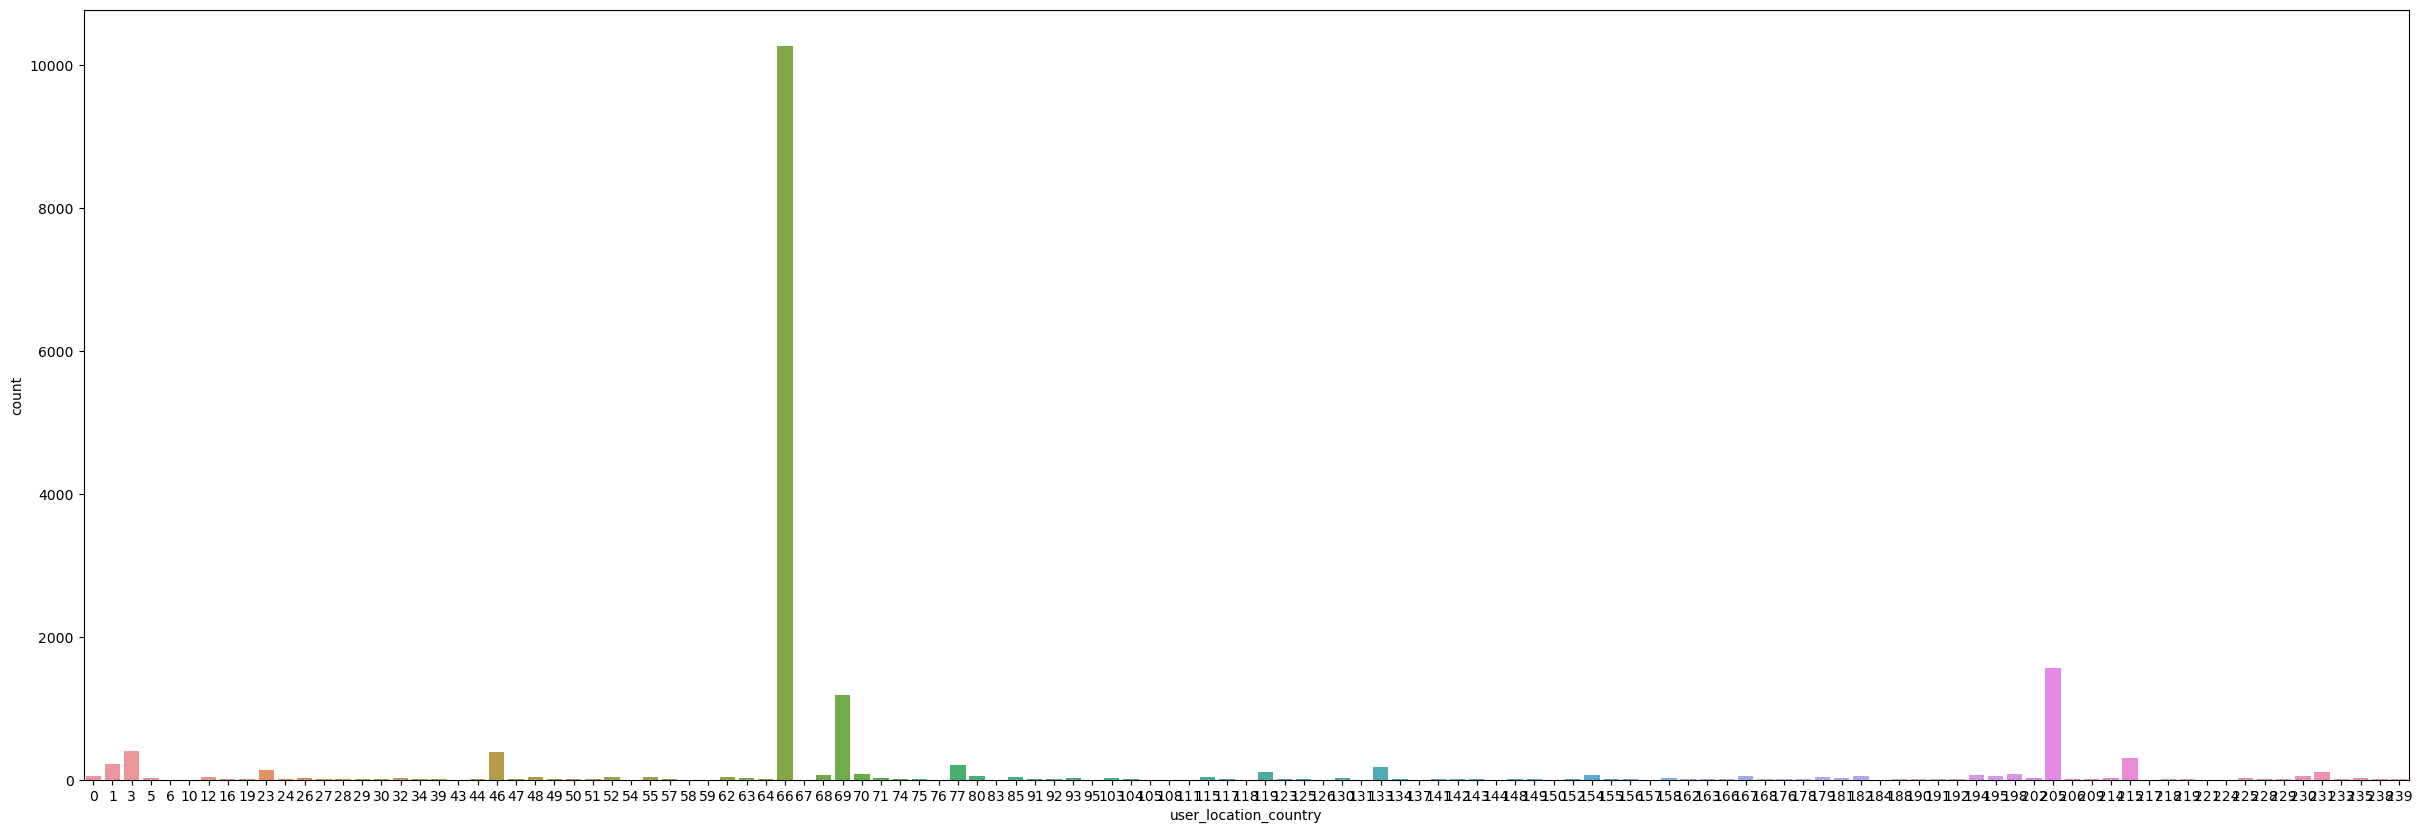

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(30,10)
sns.countplot(x='user_location_country',data=bookings.sort_values(by=['user_location_country']))

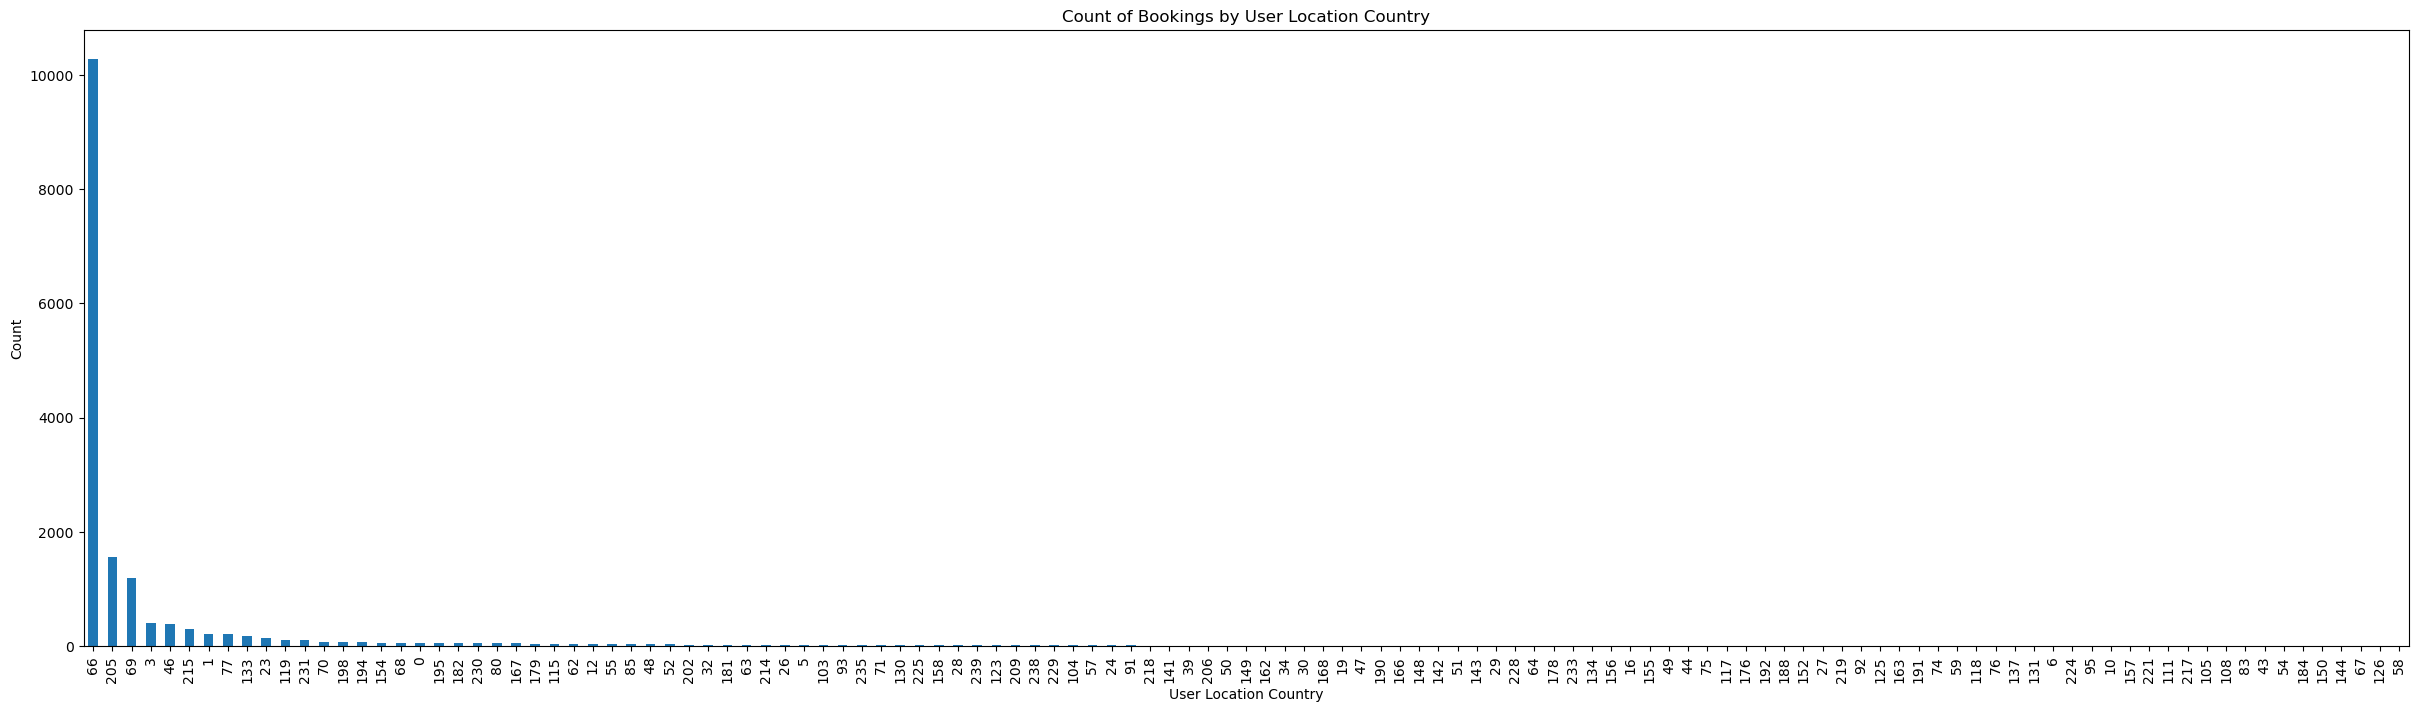

In [37]:
country_counts = bookings['user_location_country'].value_counts()


fig, ax = plt.subplots(figsize=(30, 8))
country_counts.plot(kind='bar', ax=ax)


ax.set_xlabel('User Location Country')
ax.set_ylabel('Count')
ax.set_title('Count of Bookings by User Location Country')

plt.show()

### 8. Countries the cutomer travel to?

<Axes: xlabel='hotel_country', ylabel='count'>

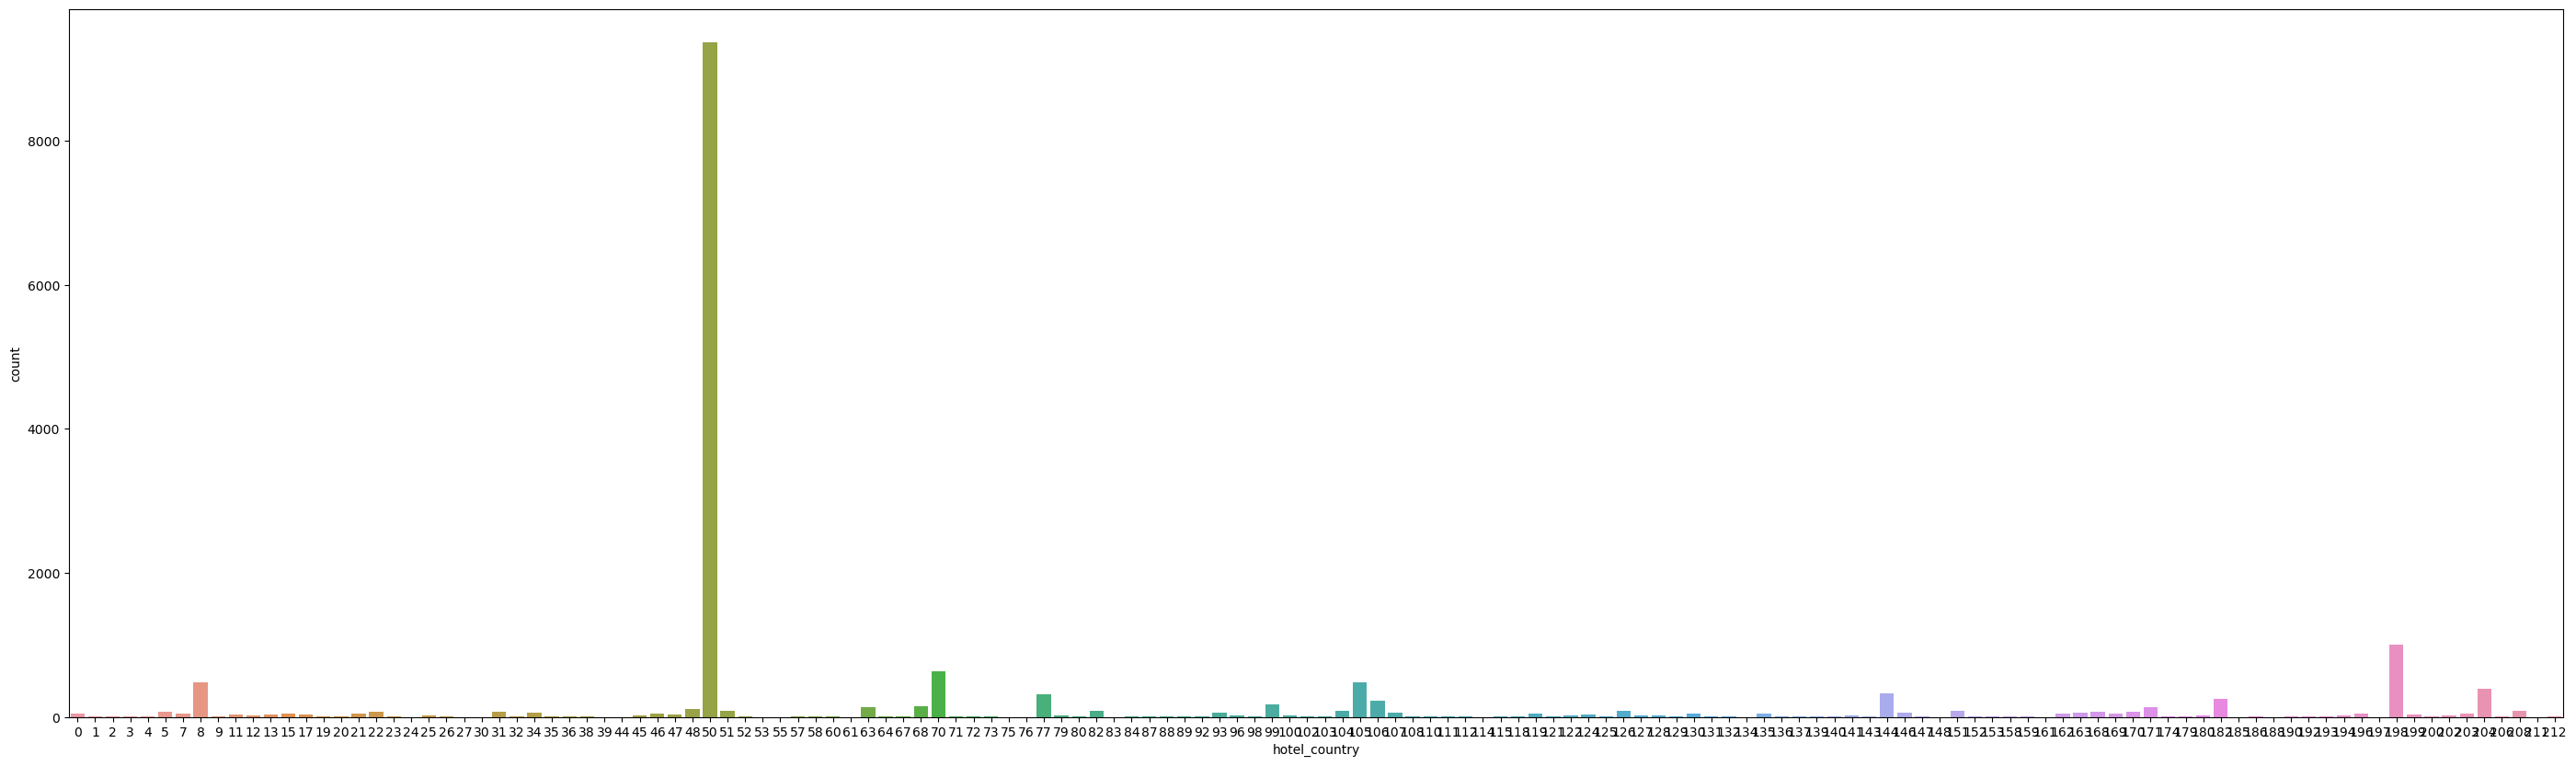

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(35,10)
sns.countplot(x='hotel_country',data=bookings.sort_values(by=['hotel_country']))

### 9. How many people by counties are booking from mobile?

<Axes: xlabel='posa_continent', ylabel='count'>

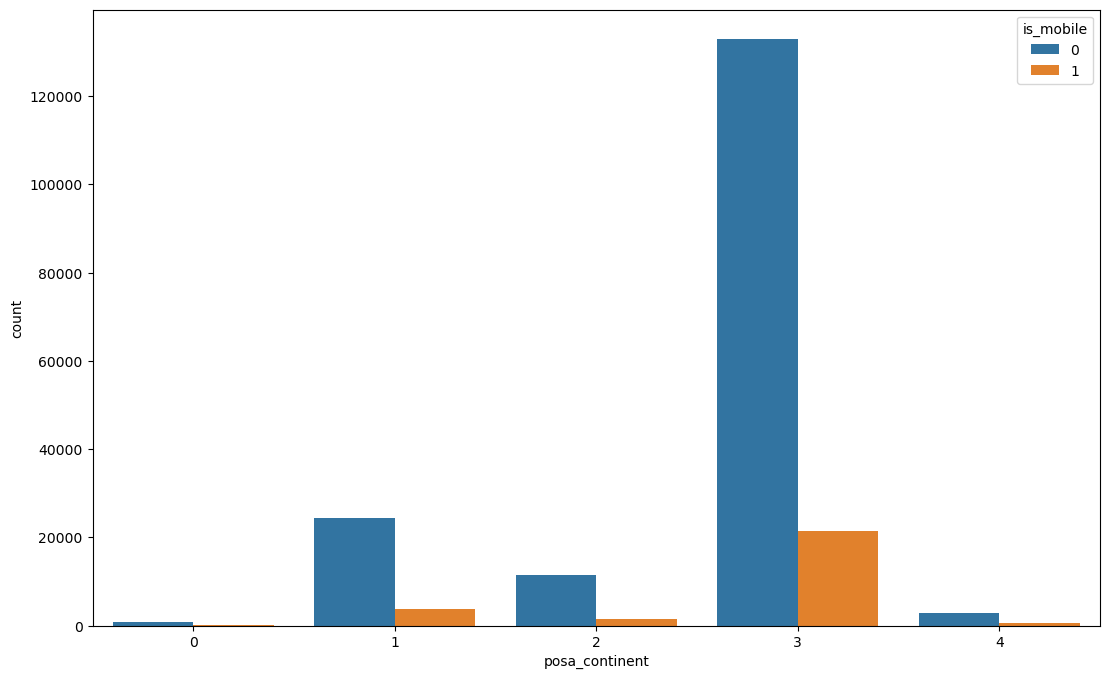

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

### 10. How many people by country are booking from mobile?

<Axes: xlabel='user_location_country', ylabel='count'>

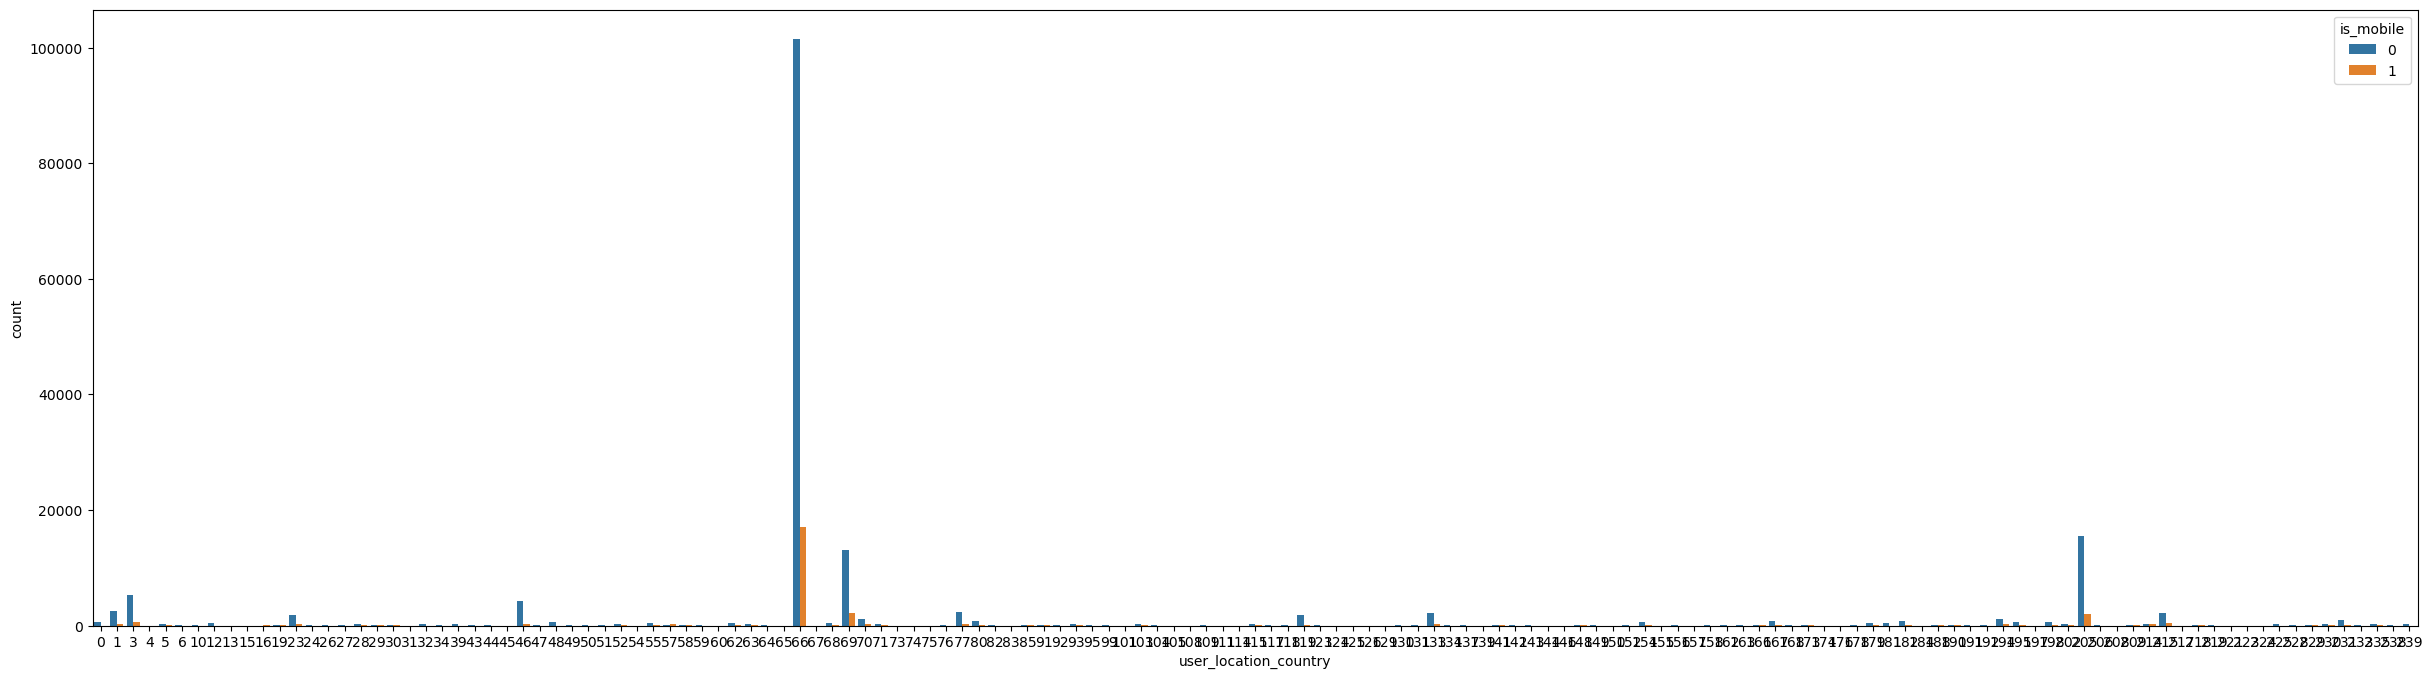

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x='user_location_country', hue='is_mobile', data = train)

### 11. Frequency of each hotel Clusters

<Axes: xlabel='hotel_cluster'>

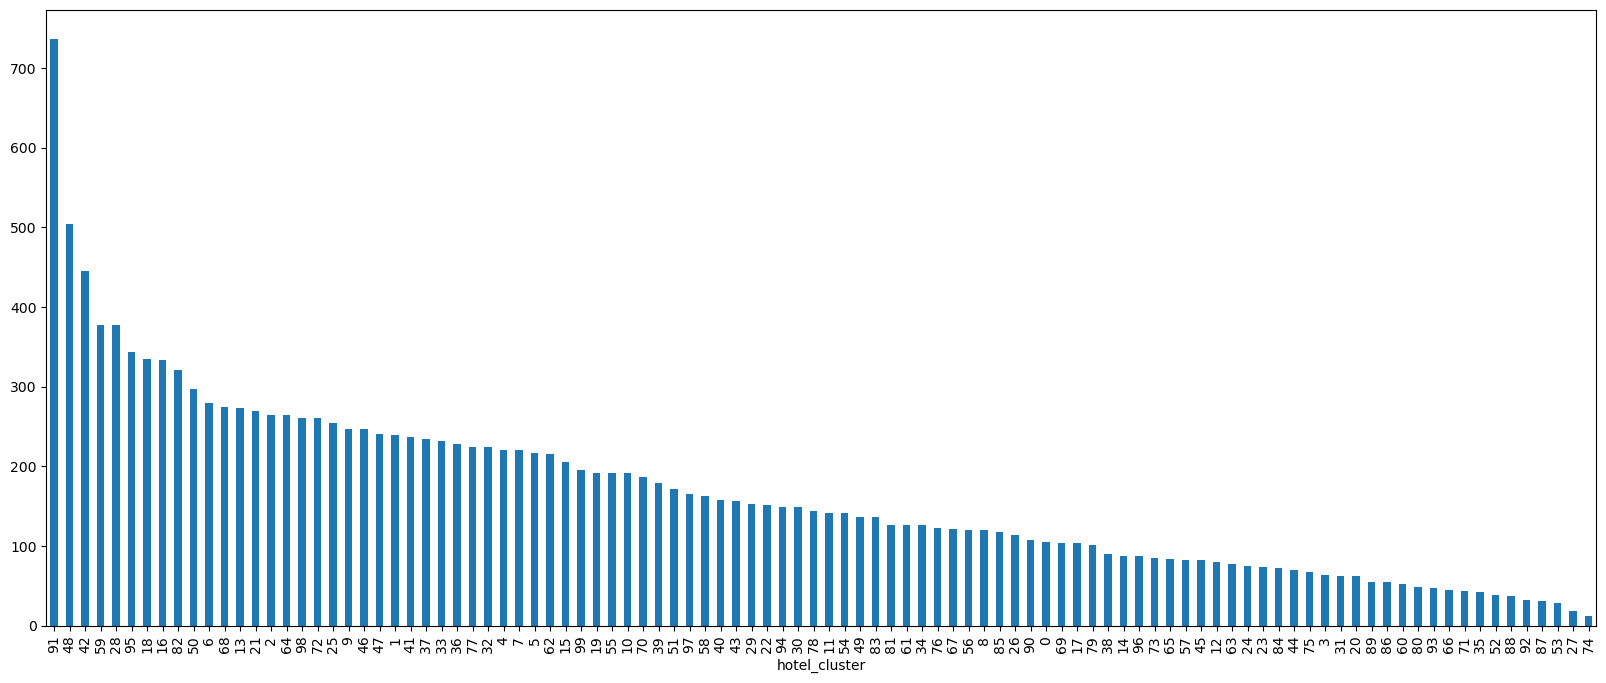

In [41]:
bookings['hotel_cluster'].value_counts().plot(kind='bar',figsize=(20,8))### 

### 12. Most impactful channel

<Axes: xlabel='channel', ylabel='count'>

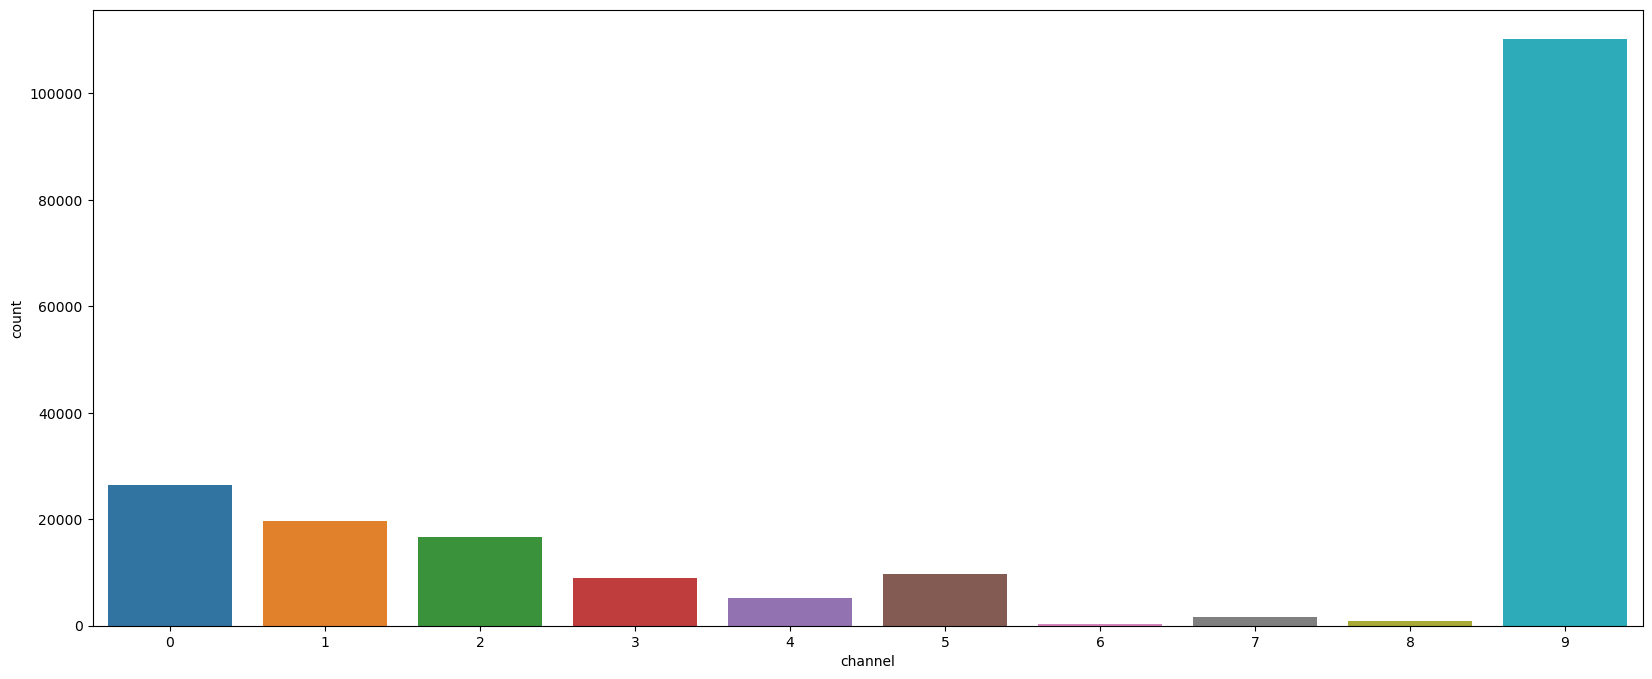

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='channel', order=list(range(0,10)), data=train)

## Feature engineering

In [46]:
def convert_date_into_days(df):
    # datetime features
    df['srch_ci'] = pd.to_datetime(df['srch_ci'], infer_datetime_format=True, errors='coerce')
    df['srch_co'] = pd.to_datetime(df['srch_co'], infer_datetime_format=True, errors='coerce')
    
    # Calculate stay_duration in days
    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).dt.days
    
    # Calculate no_of_prior_days_booking in days
    df['no_of_prior_days_booking'] = (df['srch_ci'] - df['date_time']).dt.days
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df['srch_ci'].dt.day
    df['Cin_month'] = df['srch_ci'].dt.month
    df['Cin_year'] = df['srch_ci'].dt.year
    
    return df


In [47]:
train = convert_date_into_days(train)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199823 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  199823 non-null  datetime64[ns]
 1   site_name                  199823 non-null  int64         
 2   posa_continent             199823 non-null  int64         
 3   user_location_country      199823 non-null  int64         
 4   user_location_region       199823 non-null  int64         
 5   user_location_city         199823 non-null  int64         
 6   orig_destination_distance  199823 non-null  float64       
 7   user_id                    199823 non-null  int64         
 8   is_mobile                  199823 non-null  int64         
 9   is_package                 199823 non-null  int64         
 10  channel                    199823 non-null  int64         
 11  srch_ci                    199823 non-null  datetime64[ns

In [49]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4,15,27,8,2014
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4,17,29,8,2014
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4,17,29,8,2014
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5,105,23,11,2014
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5,105,23,11,2014


### 13. How many bookings in each year?

<Axes: xlabel='Cin_year', ylabel='count'>

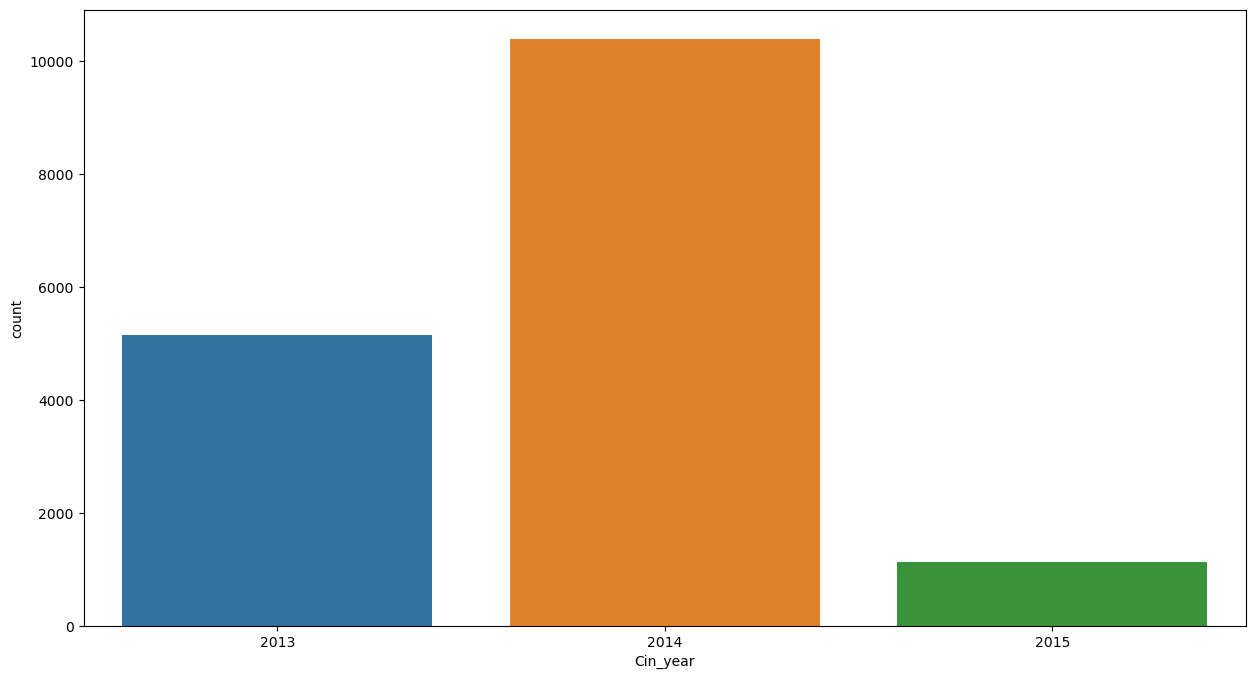

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_year',data=train[train['is_booking']==1])

### 14. Bookings in each month?

<Axes: xlabel='Cin_month', ylabel='count'>

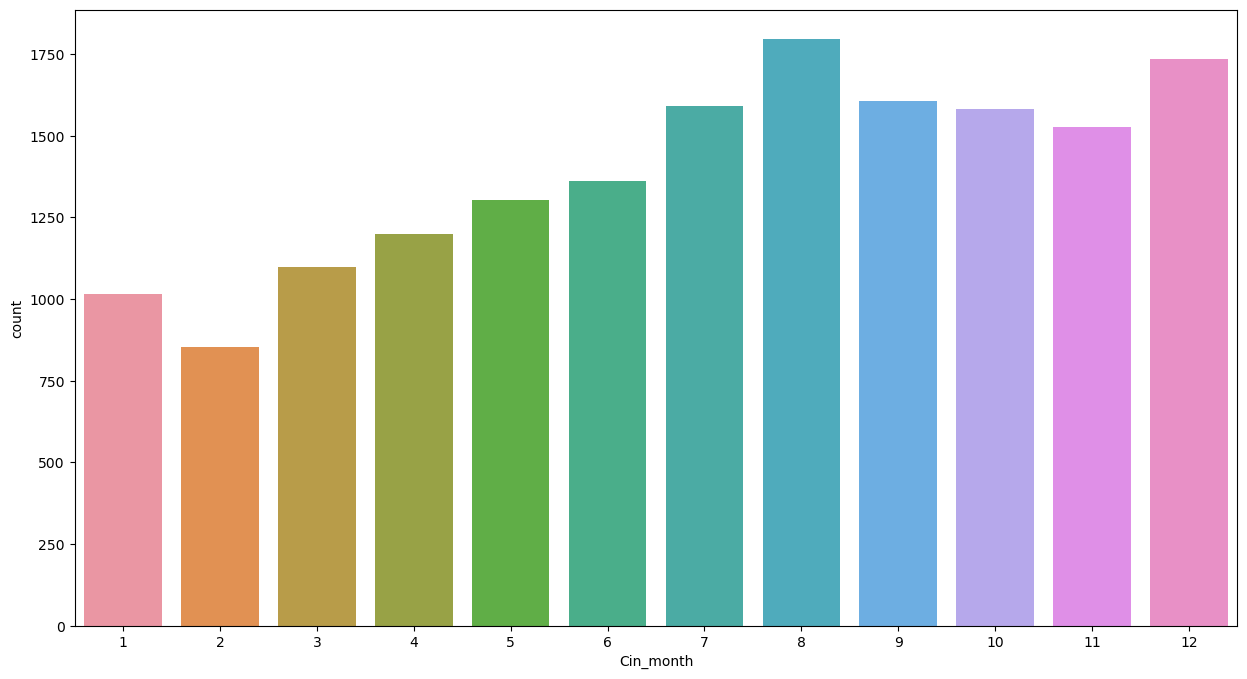

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_month',data=train[train['is_booking']==1],order=list(range(1,13)))

### 15. Bookings in each day?

<Axes: xlabel='Cin_day', ylabel='count'>

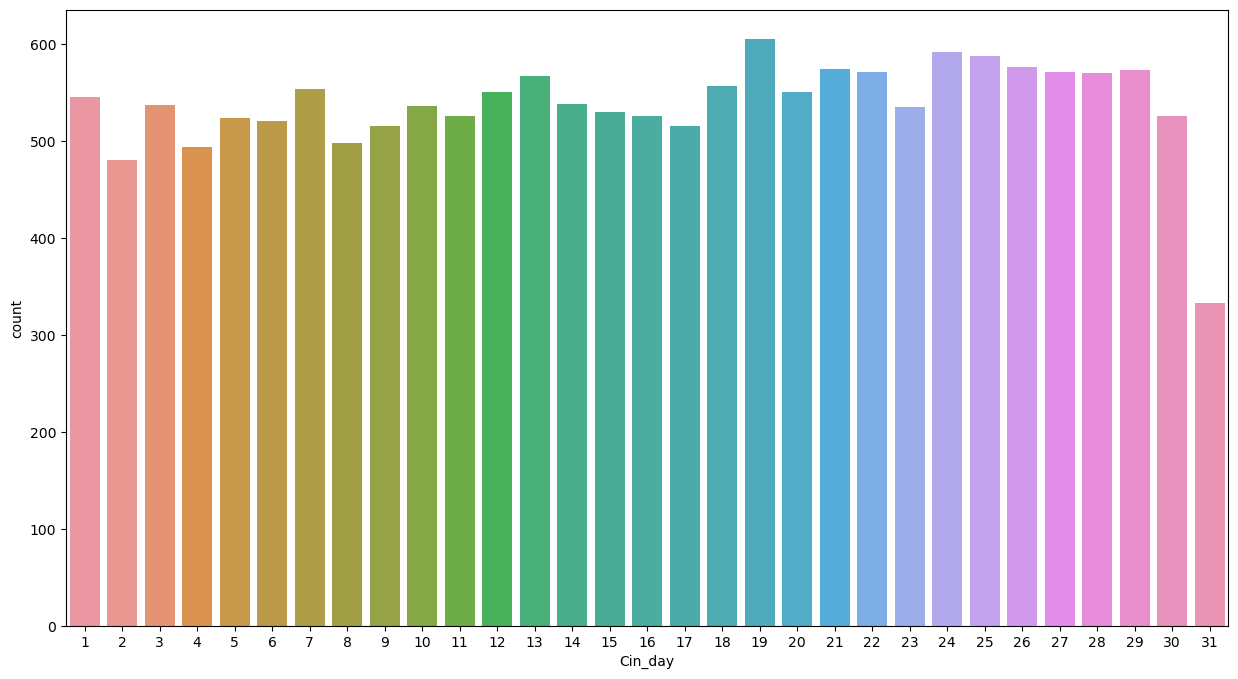

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_day',data=train[train['is_booking']==1])

### 16. Booking over years

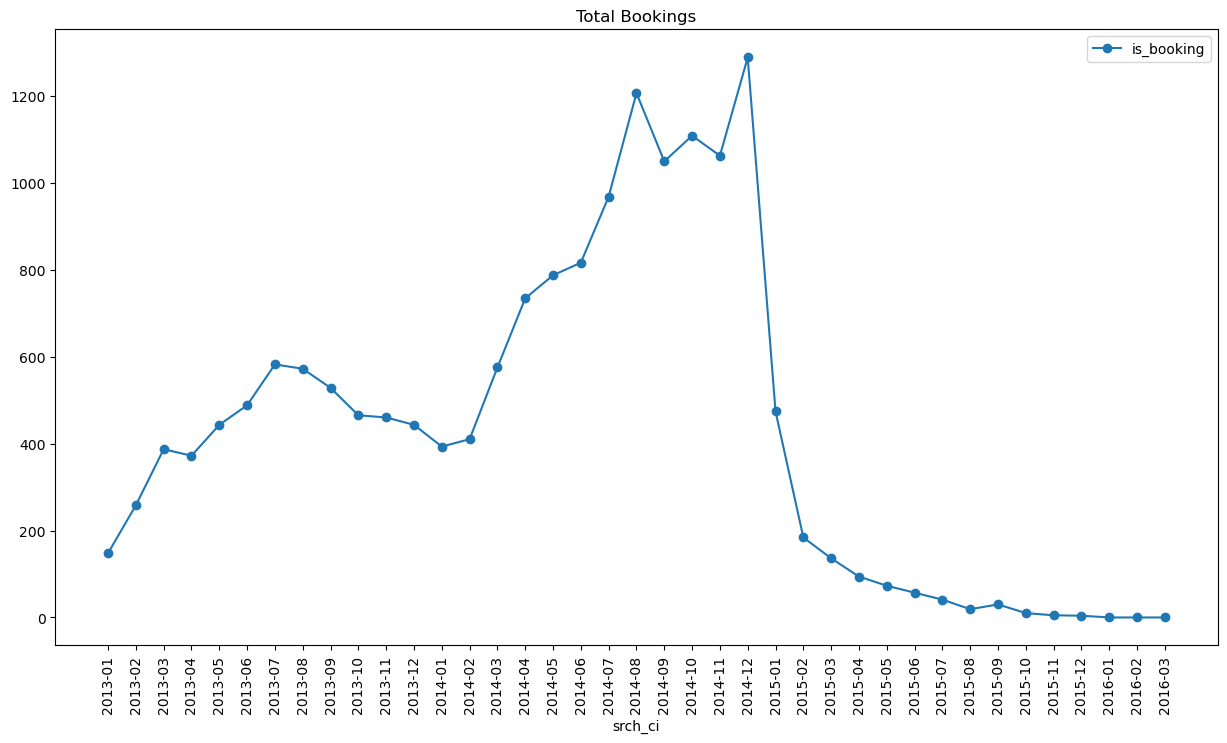

In [53]:
no_of_bookings=train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train.groupby(no_of_bookings)["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,8)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

### 17. Frequency of stay duration booked by customers

<Axes: xlabel='stay_duration', ylabel='count'>

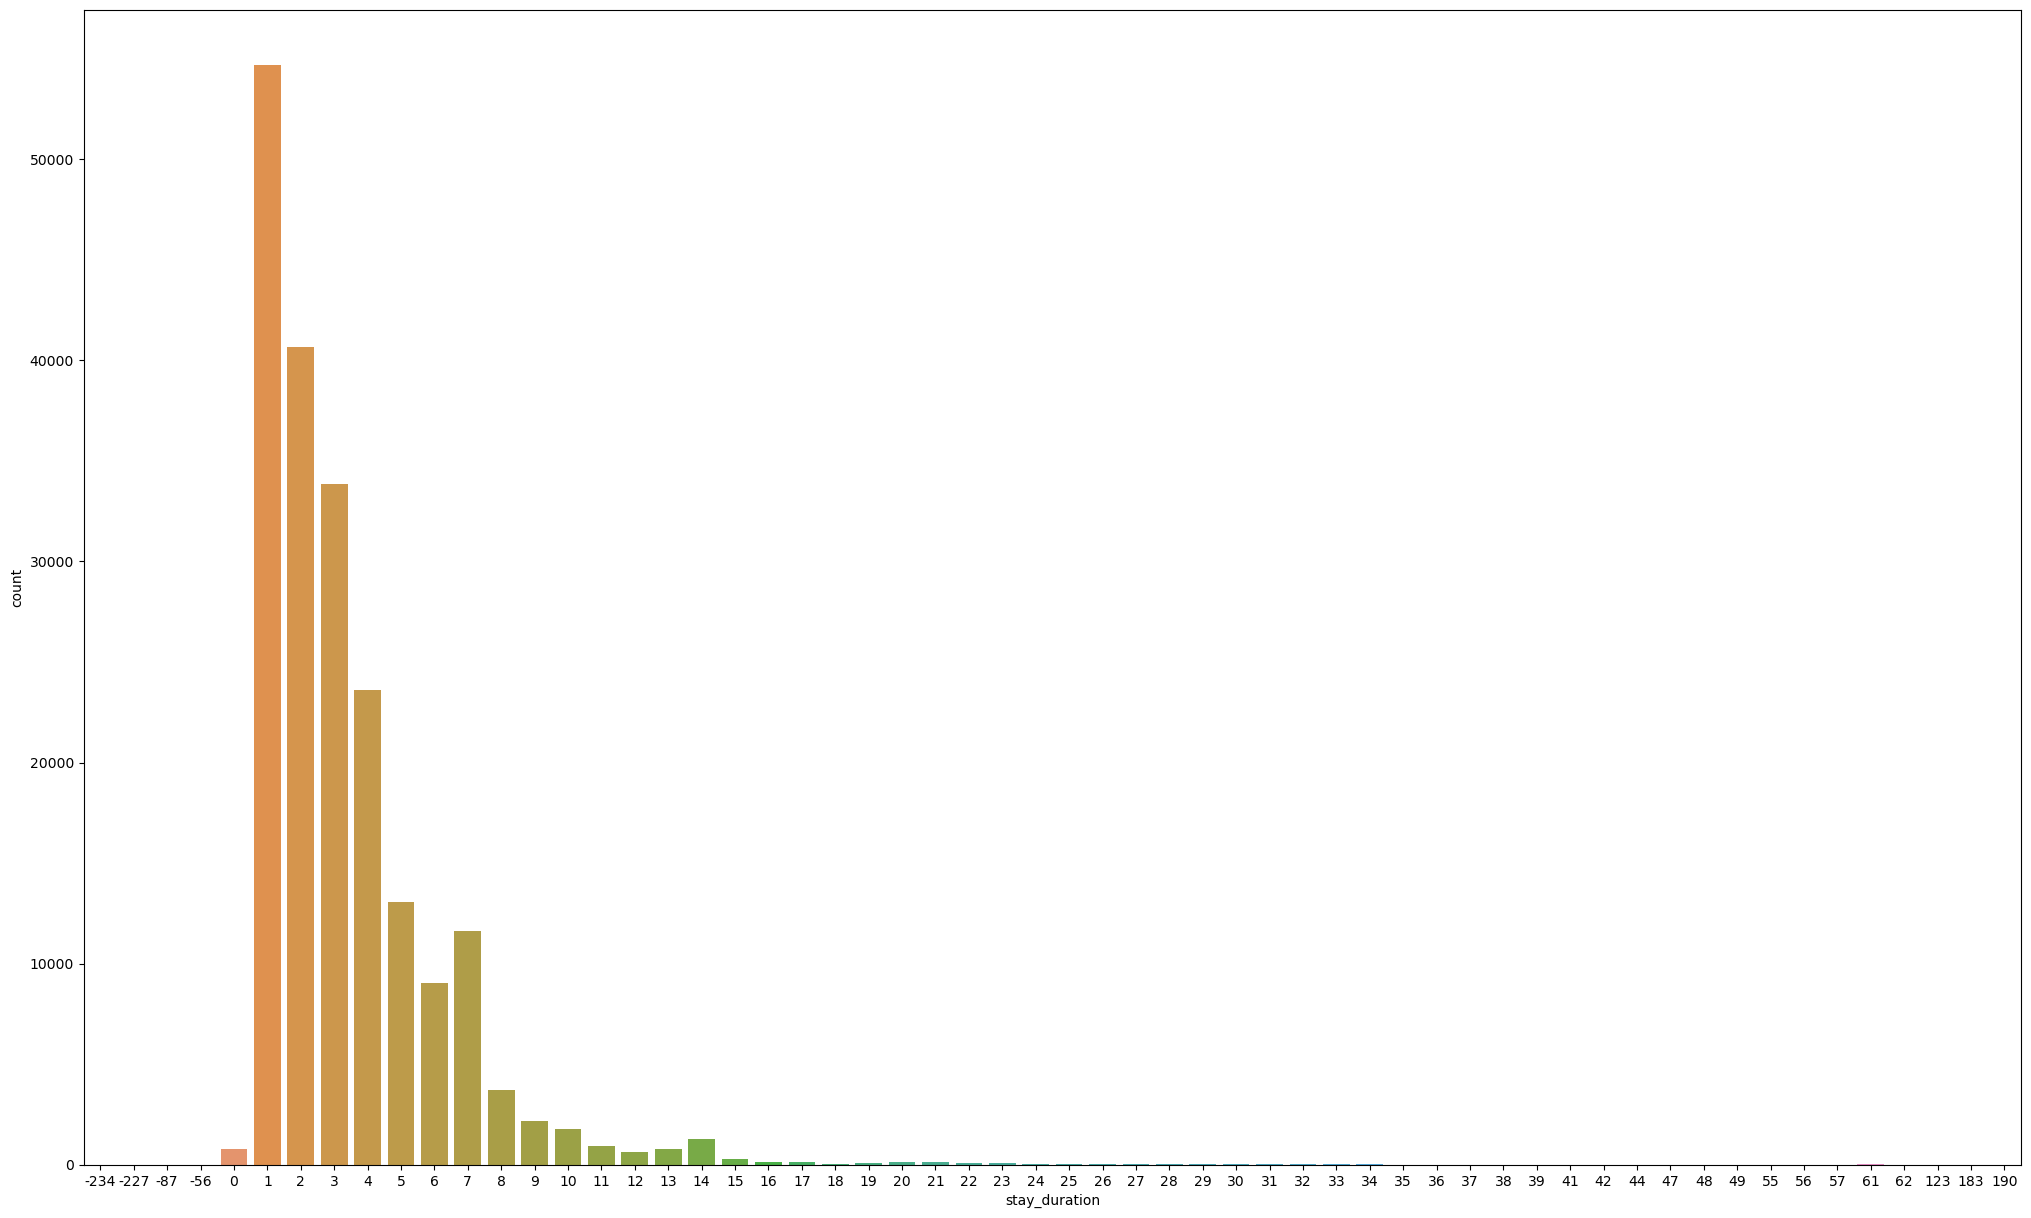

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.countplot(x="stay_duration", data=train)

<Axes: xlabel='hotel_cluster', ylabel='Density'>

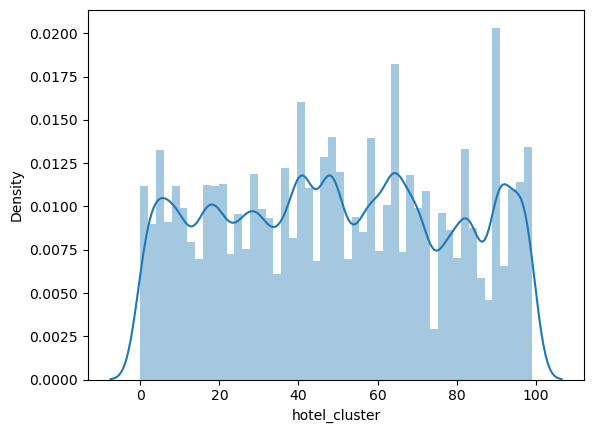

In [56]:
sns.distplot(train['hotel_cluster'])

## Data Cleaning

In [57]:
train.corr()["hotel_cluster"]

date_time                    0.000919
site_name                   -0.021180
posa_continent               0.010042
user_location_country       -0.021887
user_location_region         0.007733
user_location_city           0.000651
orig_destination_distance    0.011877
user_id                     -0.001641
is_mobile                    0.002645
is_package                   0.051934
channel                     -0.000509
srch_ci                      0.009354
srch_co                      0.009963
srch_adults_cnt              0.006847
srch_children_cnt            0.011422
srch_rm_cnt                 -0.007158
srch_destination_id         -0.012461
srch_destination_type_id    -0.032532
is_booking                  -0.025482
cnt                          0.004474
hotel_continent             -0.008548
hotel_country               -0.026294
hotel_market                 0.032740
hotel_cluster                1.000000
stay_duration                0.043633
no_of_prior_days_booking     0.027411
Cin_day     

In [58]:
columns = ['date_time', 'srch_ci', 'srch_co']
train.drop(columns=columns,axis=1,inplace=True)
test.drop(columns=columns,axis=1,inplace=True)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199823 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  199823 non-null  int64  
 1   posa_continent             199823 non-null  int64  
 2   user_location_country      199823 non-null  int64  
 3   user_location_region       199823 non-null  int64  
 4   user_location_city         199823 non-null  int64  
 5   orig_destination_distance  199823 non-null  float64
 6   user_id                    199823 non-null  int64  
 7   is_mobile                  199823 non-null  int64  
 8   is_package                 199823 non-null  int64  
 9   channel                    199823 non-null  int64  
 10  srch_adults_cnt            199823 non-null  int64  
 11  srch_children_cnt          199823 non-null  int64  
 12  srch_rm_cnt                199823 non-null  int64  
 13  srch_destination_id        199823 

In [60]:
train.shape

(199823, 26)

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         99999 non-null  int64  
 1   site_name                  99999 non-null  int64  
 2   posa_continent             99999 non-null  int64  
 3   user_location_country      99999 non-null  int64  
 4   user_location_region       99999 non-null  int64  
 5   user_location_city         99999 non-null  int64  
 6   orig_destination_distance  99999 non-null  float64
 7   user_id                    99999 non-null  int64  
 8   is_mobile                  99999 non-null  int64  
 9   is_package                 99999 non-null  int64  
 10  channel                    99999 non-null  int64  
 11  srch_adults_cnt            99999 non-null  int64  
 12  srch_children_cnt          99999 non-null  int64  
 13  srch_rm_cnt                99999 non-null  int64  


Divide the data

In [62]:
Y = train['hotel_cluster']
X = train.drop(['hotel_cluster'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199823 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  199823 non-null  int64  
 1   posa_continent             199823 non-null  int64  
 2   user_location_country      199823 non-null  int64  
 3   user_location_region       199823 non-null  int64  
 4   user_location_city         199823 non-null  int64  
 5   orig_destination_distance  199823 non-null  float64
 6   user_id                    199823 non-null  int64  
 7   is_mobile                  199823 non-null  int64  
 8   is_package                 199823 non-null  int64  
 9   channel                    199823 non-null  int64  
 10  srch_adults_cnt            199823 non-null  int64  
 11  srch_children_cnt          199823 non-null  int64  
 12  srch_rm_cnt                199823 non-null  int64  
 13  srch_destination_id        199823 

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

169849
29974


Baseline accuracy

In [66]:
from sklearn.metrics import accuracy_score
test_rows = Y_test.shape[0]
predicted_values = np.ones(test_rows) * 91
accuracy_score(Y_test, predicted_values)

0.030059384800160138

In [67]:
Y_test.shape[0]

29974

## Algorithms
### Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Training

rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)

#Prediction

rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test,rf_test_prediction)
rf_accuracy = test_accuracy



print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 91.19%
Test Accuracy: 33.16%


### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Training

lr = LogisticRegression()
lr.fit(X_train, Y_train)

#Prediction

lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,lr_train_prediction)
test_accuracy=accuracy_score(Y_test,lr_test_prediction)
lr_accuracy = test_accuracy


print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 3.15%
Test Accuracy: 3.23%


### KNN

In [72]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure X_train and X_test are NumPy arrays and contiguous
X_train = np.ascontiguousarray(np.array(X_train))
X_test = np.ascontiguousarray(np.array(X_test))

# Training
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Prediction
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(Y_train, knn_train_prediction)
test_accuracy = accuracy_score(Y_test, knn_test_prediction)
knn_accuracy = test_accuracy


print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))


Train Accuracy: 45.23%
Test Accuracy: 22.42%


### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Training

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction

dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy



print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #70
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #27

Train Accuracy: 91.20%
Test Accuracy: 33.09%


In [74]:
accuracy=[rf_accuracy*100,lr_accuracy*100,knn_accuracy*100,dt_accuracy*100]
accuracy

[33.16207379729099, 3.2328017615266567, 22.416093948088342, 33.09201307800093]

In [75]:
algorithms=["Random Forest","Logistic Regression","KNN","Decsion trees"]

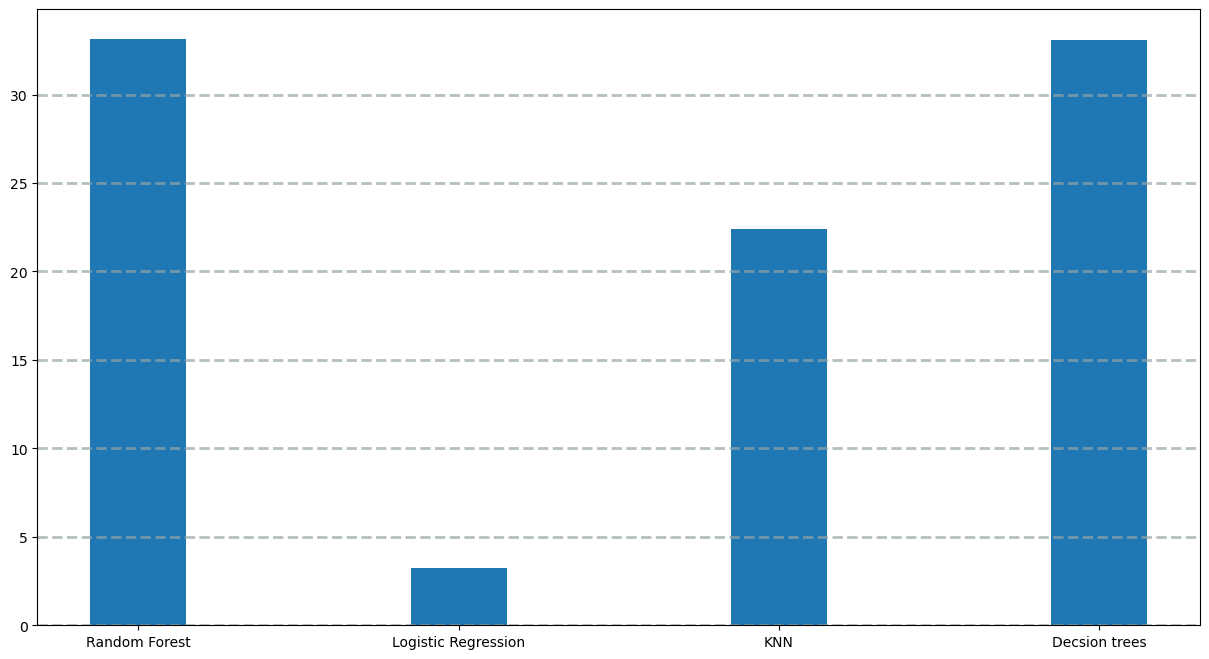

In [76]:
plt.figure(figsize=(15,8))
plt.bar(algorithms,accuracy,width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## Explore destinations file

In [103]:
destinations = pd.read_csv("C:\\Users\\Anushree\\Desktop\\machine learning\\project\\expedia-hotel-recommendations\\destinations.csv")

In [104]:
destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [105]:
destinations.shape

(62106, 150)

In [106]:
destinations

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686


In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small,columns=["pca1", "pca2", "pca3"])
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [108]:
dest_small.head()

,pca1,pca2,pca3,srch_destination_id
0,-0.044268,0.169419,0.032514,0
1,-0.440761,0.077405,-0.091573,1
2,0.001033,0.020677,0.012113,2
3,-0.480467,-0.040345,-0.019320,3
4,-0.207253,-0.042694,-0.011746,4


In [109]:
dest_small.shape

(62106, 4)

In [110]:
dest_small.size

248424

In [111]:
train.size

5195398

In [112]:
dest_small.isnull().sum()

pca1                   0
pca2                   0
pca3                   0
srch_destination_id    0
dtype: int64

In [113]:
merged = train.join(dest_small, on="srch_destination_id", how='left', rsuffix="dest")
merged2 = merged.drop("srch_destination_iddest", axis=1) 

In [114]:
merged2.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year,pca1,pca2,pca3
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,628,1,4,15,27,8,2014,0.418300,-0.059863,0.277961
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,628,1,4,17,29,8,2014,0.418300,-0.059863,0.277961
2,2,3,66,348,48862,2234.2641,12,0,0,9,...,628,1,4,17,29,8,2014,0.418300,-0.059863,0.277961
3,2,3,66,442,35390,913.1932,93,0,0,3,...,1457,80,5,105,23,11,2014,-0.185878,0.001293,0.112423
4,2,3,66,442,35390,913.6259,93,0,0,3,...,1457,21,5,105,23,11,2014,-0.185878,0.001293,0.112423


In [115]:
merged2.shape

(199823, 29)

In [116]:
merged2.isnull().sum()

site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id                        0
is_mobile                      0
is_package                     0
channel                        0
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
stay_duration                  0
no_of_prior_days_booking       0
Cin_day                        0
Cin_month                      0
Cin_year                       0
pca1                         427
pca2                         427
pca3                         427
dtype: int64

In [117]:
rows_with_missing_values = merged2[merged2.isnull().any(axis=1)]

In [118]:
print(rows_with_missing_values)

        site_name  posa_continent  user_location_country  \
211            24               2                      3   
212            24               2                      3   
213            24               2                      3   
265            24               2                      3   
266            24               2                      3   
...           ...             ...                    ...   
197455          2               3                     66   
199693         13               1                     46   
199694         13               1                     46   
199962          2               3                     66   
199963          2               3                     66   

        user_location_region  user_location_city  orig_destination_distance  \
211                       64                9448                1953.335631   
212                       64                9448                1953.335631   
213                       64              

In [119]:
merged_new=merged2.dropna()

In [120]:
merged_new.isnull().sum()

site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
stay_duration                0
no_of_prior_days_booking     0
Cin_day                      0
Cin_month                    0
Cin_year                     0
pca1                         0
pca2                         0
pca3                         0
dtype: int64

In [121]:
Y_data = merged_new['hotel_cluster']
X_data= merged_new.drop(['hotel_cluster'],axis=1)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199396 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  199396 non-null  int64  
 1   posa_continent             199396 non-null  int64  
 2   user_location_country      199396 non-null  int64  
 3   user_location_region       199396 non-null  int64  
 4   user_location_city         199396 non-null  int64  
 5   orig_destination_distance  199396 non-null  float64
 6   user_id                    199396 non-null  int64  
 7   is_mobile                  199396 non-null  int64  
 8   is_package                 199396 non-null  int64  
 9   channel                    199396 non-null  int64  
 10  srch_adults_cnt            199396 non-null  int64  
 11  srch_children_cnt          199396 non-null  int64  
 12  srch_rm_cnt                199396 non-null  int64  
 13  srch_destination_id        199396 

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

169486
29910


In [123]:
from sklearn.metrics import accuracy_score
test_rows = Y_test.shape[0]
predicted_values = np.ones(test_rows) * 91
accuracy_score(Y_test, predicted_values)

0.029220996322300234

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Training

rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)

#Prediction

rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test,rf_test_prediction)
rf_accuracy = test_accuracy



print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 91.27%
Test Accuracy: 33.11%


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Training

lr = LogisticRegression()
lr.fit(X_train, Y_train)

#Prediction

lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,lr_train_prediction)
test_accuracy=accuracy_score(Y_test,lr_test_prediction)
lr_accuracy = test_accuracy



print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 3.25%
Test Accuracy: 3.16%


In [126]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure X_train and X_test are NumPy arrays and contiguous
X_train = np.ascontiguousarray(np.array(X_train))
X_test = np.ascontiguousarray(np.array(X_test))

# Training
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Prediction
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(Y_train, knn_train_prediction)
test_accuracy = accuracy_score(Y_test, knn_test_prediction)
knn_accuracy = test_accuracy

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))


Train Accuracy: 45.14%
Test Accuracy: 22.46%


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Training

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction

dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy


print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #70
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #27

Train Accuracy: 91.28%
Test Accuracy: 32.98%


In [128]:
accuracy=[rf_accuracy*100,lr_accuracy*100,knn_accuracy*100,dt_accuracy*100]
accuracy

[33.10598462052825, 3.1628217987295217, 22.46071547977265, 32.97559344700769]

In [129]:
algorithms=["Random Forest","Logistic Regression","KNN","Decsion trees"]

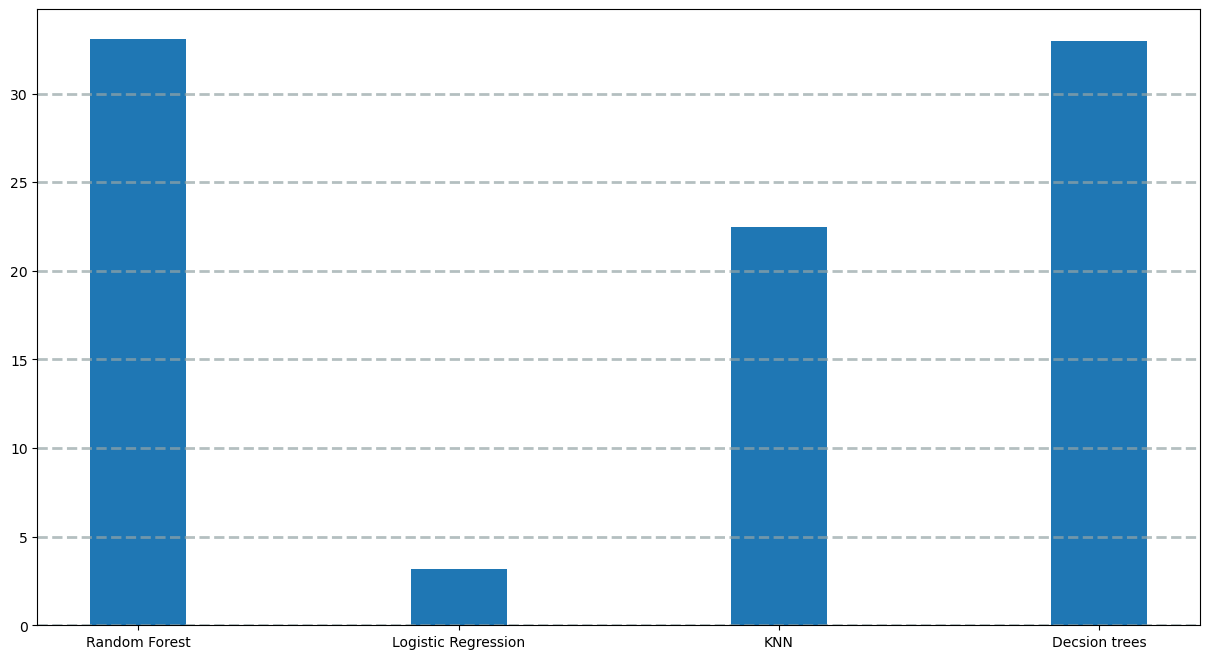

In [130]:
plt.figure(figsize=(15,8))
plt.bar(algorithms,accuracy,width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### Calculate the top 5 accuarcy of RF

In [131]:
prob_predictions_train = rf.predict_proba(X_train)
prob_predictions_train

array([[0.    , 0.    , 0.0125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

In [132]:
prob_predictions_test = rf.predict_proba(X_test)
prob_predictions_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18977814, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0125    , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0125    , ..., 0.        , 0.        ,
        0.025     ],
       [0.0375    , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [133]:
prob_predictions_train.shape

(169486, 100)

In [134]:
top_train_hotel_clusters = prob_predictions_train.argsort(axis=1)
top_train_hotel_clusters

array([[ 0, 73, 71, ..., 13, 37, 64],
       [ 0, 70, 69, ..., 11, 64, 68],
       [ 0, 66, 65, ..., 41, 72, 77],
       ...,
       [ 0, 69, 68, ..., 17, 83,  5],
       [ 0, 71, 70, ..., 47, 28, 43],
       [ 0, 72, 71, ..., 56, 50,  5]], dtype=int64)

In [135]:
prob_predictions_train[0,53], prob_predictions_train[0,0]

(0.0, 0.0)

In [136]:
prob_predictions_train[0,49]

0.0

In [137]:
prob_predictions_train.argsort(axis=1)

array([[ 0, 73, 71, ..., 13, 37, 64],
       [ 0, 70, 69, ..., 11, 64, 68],
       [ 0, 66, 65, ..., 41, 72, 77],
       ...,
       [ 0, 69, 68, ..., 17, 83,  5],
       [ 0, 71, 70, ..., 47, 28, 43],
       [ 0, 72, 71, ..., 56, 50,  5]], dtype=int64)

In [138]:
np.flip(prob_predictions_train.argsort(axis=1), axis=1)

array([[64, 37, 13, ..., 71, 73,  0],
       [68, 64, 11, ..., 69, 70,  0],
       [77, 72, 41, ..., 65, 66,  0],
       ...,
       [ 5, 83, 17, ..., 68, 69,  0],
       [43, 28, 47, ..., 70, 71,  0],
       [ 5, 50, 56, ..., 71, 72,  0]], dtype=int64)

In [139]:
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:5]
temp

array([[64, 37, 13, 55, 68],
       [68, 64, 11, 37,  9],
       [77, 72, 41, 48, 49],
       ...,
       [ 5, 83, 17, 48, 42],
       [43, 28, 47,  7, 32],
       [ 5, 50, 56, 10, 21]], dtype=int64)

In [140]:
Y_train

127642    64
177529    68
40182     77
28022     97
129137    70
          ..
73585      0
109595    98
50205      5
5215      43
128443     5
Name: hotel_cluster, Length: 169486, dtype: int64

In [141]:
rf_train_prediction

array([64, 68, 77, ...,  5, 43,  5], dtype=int64)

In [142]:
y_train_index_reset = Y_train.reset_index(drop=True)

In [143]:
y_train_index_reset

0         64
1         68
2         77
3         97
4         70
          ..
169481     0
169482    98
169483     5
169484    43
169485     5
Name: hotel_cluster, Length: 169486, dtype: int64

In [144]:
predicted_in_top_5 = 0
for i in range(len(y_train_index_reset)-1):
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_5 = predicted_in_top_5 + 1
predicted_in_top_5

168467

In [145]:
#calculate the percentage of instances in the training set for which the true label was among the model's top 5 predictions
predicted_in_top_5/len(y_train_index_reset) * 100 

99.39877039991504

In [146]:
k = 5
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:k] # sort, flip and slice
predicted_in_top_k = 0
for i in range(len(y_train_index_reset)-1): #reset index
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_train_index_reset) * 100
print(accuracy)

99.39877039991504


In [147]:
k = 5
temp = np.flip(prob_predictions_test.argsort(axis=1), axis=1)[:,0:k]
y_test_index_reset = Y_test.reset_index(drop=True)
predicted_in_top_k = 0
for i in range(len(y_test_index_reset)-1):
    if y_test_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_test_index_reset) * 100
print(accuracy)

60.625208960213975


In [148]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Predicted probabilities
prob_predictions_train = rf.predict_proba(X_train)
prob_predictions_test = rf.predict_proba(X_test)

# Function to calculate top-k accuracy
def calculate_top_k_accuracy(predictions, true_labels, k=5):
    top_k_predictions = np.flip(predictions.argsort(axis=1), axis=1)[:, :k]
    true_labels = true_labels.reset_index(drop=True)
    hits = sum(true_label in top_k_predictions[i, :] for i, true_label in enumerate(true_labels))
    return (hits / len(true_labels)) * 100

# Calculate the top-5 accuracy for training and test sets
train_accuracy = calculate_top_k_accuracy(prob_predictions_train, Y_train, k=5)
test_accuracy = calculate_top_k_accuracy(prob_predictions_test, Y_test, k=5)

print(f"Top-5 Accuracy on Training Set: {train_accuracy}%")
print(f"Top-5 Accuracy on Test Set: {test_accuracy}%")

Top-5 Accuracy on Training Set: 99.39936041914966%
Top-5 Accuracy on Test Set: 61.35406218655967%


### Improvements

1. Use undersampling techniques.

2. Additionally, we can take the route of creating an ensemble of models, containing some combination of Xgboost and a couple different models.

3. Grouping the features : grouping features that are used uniquely for identifying user and hotel locations (for example, they grouped the features “userlocationcountry”, “userlocationregion”, and “userlocationcity” into a Tuple unit which was then used as a more precise input to their model).

4. Evaluation using the Mean Average Precision.

5. Feature selection using chi square method.